# Next-Day Rain Prediction

Prepared by Marvin Rubia [(My LinkedIn)](https://www.linkedin.com/in/marvinrubia08)

## Import Libraries

In [56]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## About the dataset

The original source is Australian Government's Bureau of Meteorology and the latest data can be gathered from [http://www.bom.gov.au/climate/dwo/](http://www.bom.gov.au/climate/dwo/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01).

The dataset to be used has extra columns like 'RainToday' and our target is 'RainTomorrow', which was gathered from the Rattle at [https://bitbucket.org/kayontoga/rattle/src/master/data/weatherAUS.RData](https://bitbucket.org/kayontoga/rattle/src/master/data/weatherAUS.RData?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01).

This dataset contains observations of weather metrics for each day from 2008 to 2017 in Sydney, NSW. The **Weather_Data.csv** dataset includes the following fields:

| Field         | Description                                           | Unit            | Type   |
| ------------- | ----------------------------------------------------- | --------------- | ------ |
| Date          | Date of the Observation in YYYY-MM-DD                 | Date            | object |
| MinTemp       | Minimum temperature                                   | Celsius         | float  |
| MaxTemp       | Maximum temperature                                   | Celsius         | float  |
| Rainfall      | Amount of rainfall                                    | Millimeters     | float  |
| Evaporation   | Amount of evaporation                                 | Millimeters     | float  |
| Sunshine      | Amount of bright sunshine                             | hours           | float  |
| WindGustDir   | Direction of the strongest gust                       | Compass Points  | object |
| WindGustSpeed | Speed of the strongest gust                           | Kilometers/Hour | int |
| WindDir9am    | Wind direction averaged of 10 minutes prior to 9am    | Compass Points  | object |
| WindDir3pm    | Wind direction averaged of 10 minutes prior to 3pm    | Compass Points  | object |
| WindSpeed9am  | Wind speed averaged of 10 minutes prior to 9am        | Kilometers/Hour | float  |
| WindSpeed3pm  | Wind speed averaged of 10 minutes prior to 3pm        | Kilometers/Hour | float  |
| Humidity9am   | Humidity at 9am                                       | Percent         | float  |
| Humidity3pm   | Humidity at 3pm                                       | Percent         | float  |
| Pressure9am   | Atmospheric pressure reduced to mean sea level at 9am | Hectopascal     | float  |
| Pressure3pm   | Atmospheric pressure reduced to mean sea level at 3pm | Hectopascal     | float  |
| Cloud9am      | Fraction of the sky obscured by cloud at 9am          | Eights          | float  |
| Cloud3pm      | Fraction of the sky obscured by cloud at 3pm          | Eights          | float  |
| Temp9am       | Temperature at 9am                                    | Celsius         | float  |
| Temp3pm       | Temperature at 3pm                                    | Celsius         | float  |
| RainToday     | If there is rain today                               | Yes/No          | object |
| RainTomorrow  | If there is rain tomorrow                             | Yes/No          | object  |

Column definitions were gathered from [http://www.bom.gov.au/climate/dwo/IDCJDW0000.shtml](http://www.bom.gov.au/climate/dwo/IDCJDW0000.shtml?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01)


__Citation__: The .csv file was prepared by the instructors of IBM's course _Machine Learning with Python_. Thanks to Joseph Santarcangelo, Ph.D. and Svitlana Kramar.

## Load and understand the dataset

In [57]:
url = 'https://raw.githubusercontent.com/marvin-rubia/Next-Day-Rain-Prediction/main/Weather_Data.csv'
df = pd.read_csv(url)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3271 entries, 0 to 3270
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           3271 non-null   object 
 1   MinTemp        3271 non-null   float64
 2   MaxTemp        3271 non-null   float64
 3   Rainfall       3271 non-null   float64
 4   Evaporation    3271 non-null   float64
 5   Sunshine       3271 non-null   float64
 6   WindGustDir    3271 non-null   object 
 7   WindGustSpeed  3271 non-null   int64  
 8   WindDir9am     3271 non-null   object 
 9   WindDir3pm     3271 non-null   object 
 10  WindSpeed9am   3271 non-null   int64  
 11  WindSpeed3pm   3271 non-null   int64  
 12  Humidity9am    3271 non-null   int64  
 13  Humidity3pm    3271 non-null   int64  
 14  Pressure9am    3271 non-null   float64
 15  Pressure3pm    3271 non-null   float64
 16  Cloud9am       3271 non-null   int64  
 17  Cloud3pm       3271 non-null   int64  
 18  Temp9am 

In [59]:
df.tail(10)

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
3261,6/16/2017,11.9,17.3,0.0,1.6,0.2,WNW,26,W,WSW,...,79,69,1026.2,1023.5,7,7,13.3,17.2,No,No
3262,6/17/2017,13.2,19.1,0.0,1.0,0.2,SSW,26,WNW,SSW,...,81,67,1024.3,1021.8,7,7,14.6,17.4,No,Yes
3263,6/18/2017,11.3,18.0,1.8,2.0,6.3,S,52,SW,SSW,...,83,62,1025.7,1025.8,3,5,12.9,17.6,Yes,No
3264,6/19/2017,11.2,18.3,0.4,2.2,1.9,SSW,37,W,S,...,79,69,1030.4,1028.4,6,7,12.7,17.2,No,Yes
3265,6/20/2017,11.3,20.0,4.4,2.2,5.8,W,26,W,SSW,...,88,60,1028.7,1025.2,6,1,11.9,19.7,Yes,No
3266,6/21/2017,8.6,19.6,0.0,2.0,7.8,SSE,37,W,SSE,...,73,52,1025.9,1025.3,2,2,10.5,17.9,No,No
3267,6/22/2017,9.3,19.2,0.0,2.0,9.2,W,30,W,ESE,...,78,53,1028.5,1024.6,2,2,11.0,18.7,No,No
3268,6/23/2017,9.4,17.7,0.0,2.4,2.7,W,24,WNW,N,...,85,56,1020.8,1015.0,6,6,10.2,17.3,No,No
3269,6/24/2017,10.1,19.3,0.0,1.4,9.3,W,43,W,W,...,56,35,1017.3,1015.1,5,2,12.4,19.0,No,No
3270,6/25/2017,7.6,19.3,0.0,3.4,9.4,W,35,W,W,...,73,32,1018.6,1015.4,1,1,9.4,18.8,No,No


### <font color=red>[Sidenote on RainToday</font>

In [5]:
# Create dataframe for only RainToday and Rainfall columns
df_RToday_RF = df[['RainToday','Rainfall']]

# Show the least RainFall value for records of RainToday = 1
condition = df['RainToday'] == 'Yes'
df_RToday_RF[condition].sort_values(by='Rainfall', ascending=True)

,RainToday,Rainfall
403,Yes,1.2
104,Yes,1.2
1677,Yes,1.2
2544,Yes,1.2
1823,Yes,1.2
...,...,...
1707,Yes,95.2
1104,Yes,99.4
2484,Yes,105.8
1425,Yes,109.4


The dataset __confirms__ a rain for the day if the amount of rainfall (in millimeters) is at least 1.2 mm. 

### <font color=red>End of Sidenote]</font>

## Data Pre-Processing

#### Replace categorical Yes and No with binary 1 and 0 for RainToday and RainTomorrow columns

In [ ]:
# df = df.drop

In [6]:
df.replace(['Yes', 'No'], [1, 0], inplace=True)

In [7]:
df.tail(10)

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
3261,6/16/2017,11.9,17.3,0.0,1.6,0.2,WNW,26,W,WSW,...,79,69,1026.2,1023.5,7,7,13.3,17.2,0,0
3262,6/17/2017,13.2,19.1,0.0,1.0,0.2,SSW,26,WNW,SSW,...,81,67,1024.3,1021.8,7,7,14.6,17.4,0,1
3263,6/18/2017,11.3,18.0,1.8,2.0,6.3,S,52,SW,SSW,...,83,62,1025.7,1025.8,3,5,12.9,17.6,1,0
3264,6/19/2017,11.2,18.3,0.4,2.2,1.9,SSW,37,W,S,...,79,69,1030.4,1028.4,6,7,12.7,17.2,0,1
3265,6/20/2017,11.3,20.0,4.4,2.2,5.8,W,26,W,SSW,...,88,60,1028.7,1025.2,6,1,11.9,19.7,1,0
3266,6/21/2017,8.6,19.6,0.0,2.0,7.8,SSE,37,W,SSE,...,73,52,1025.9,1025.3,2,2,10.5,17.9,0,0
3267,6/22/2017,9.3,19.2,0.0,2.0,9.2,W,30,W,ESE,...,78,53,1028.5,1024.6,2,2,11.0,18.7,0,0
3268,6/23/2017,9.4,17.7,0.0,2.4,2.7,W,24,WNW,N,...,85,56,1020.8,1015.0,6,6,10.2,17.3,0,0
3269,6/24/2017,10.1,19.3,0.0,1.4,9.3,W,43,W,W,...,56,35,1017.3,1015.1,5,2,12.4,19.0,0,0
3270,6/25/2017,7.6,19.3,0.0,3.4,9.4,W,35,W,W,...,73,32,1018.6,1015.4,1,1,9.4,18.8,0,0


#### Convert Date column to date type

In [60]:
df['Date'] = pd.to_datetime(df['Date'])

#### Add a new column called 'Month'

In [61]:
df.insert(1, 'Month', df['Date'].dt.month)
df.tail()

,Date,Month,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
3266,2017-06-21,6,8.6,19.6,0.0,2.0,7.8,SSE,37,W,...,73,52,1025.9,1025.3,2,2,10.5,17.9,No,No
3267,2017-06-22,6,9.3,19.2,0.0,2.0,9.2,W,30,W,...,78,53,1028.5,1024.6,2,2,11.0,18.7,No,No
3268,2017-06-23,6,9.4,17.7,0.0,2.4,2.7,W,24,WNW,...,85,56,1020.8,1015.0,6,6,10.2,17.3,No,No
3269,2017-06-24,6,10.1,19.3,0.0,1.4,9.3,W,43,W,...,56,35,1017.3,1015.1,5,2,12.4,19.0,No,No
3270,2017-06-25,6,7.6,19.3,0.0,3.4,9.4,W,35,W,...,73,32,1018.6,1015.4,1,1,9.4,18.8,No,No


__Why did we add a Month column?__ Because climate depends on months. Certain months are more susceptible to rainfall than other months.

In [63]:
# Check rainy days per month

df[['Month', 'RainToday']].groupby('Month').count()

,RainToday
Month,
1,277
2,255
3,310
4,265
5,310
6,290
7,276
8,269
9,260


Our data confirms the rainy season in Sydney, which is known to occur from March to June.

Because Month values (1 to 12) are cyclical, we need to convert them into cyclical equivalents using trigonometric sine and cosine. In this way, algorithms will tream them properly without misinterpreting ordinal hierarchy from 1 to 12. 

In [64]:
Month_sin = np.sin(2 * np.pi * df['Month'] / 12)

df.insert(2, 'Month_sin', Month_sin)

In [65]:
Month_cos = np.cos(2 * np.pi * df['Month'] / 12)

df.insert(3, 'Month_cos', Month_cos)

In [15]:
df.tail(10)

,Date,Month,Month_sin,Month_cos,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
3261,2017-06-16,6,1.224647e-16,-1.0,11.9,17.3,0.0,1.6,0.2,WNW,...,79,69,1026.2,1023.5,7,7,13.3,17.2,0,0
3262,2017-06-17,6,1.224647e-16,-1.0,13.2,19.1,0.0,1.0,0.2,SSW,...,81,67,1024.3,1021.8,7,7,14.6,17.4,0,1
3263,2017-06-18,6,1.224647e-16,-1.0,11.3,18.0,1.8,2.0,6.3,S,...,83,62,1025.7,1025.8,3,5,12.9,17.6,1,0
3264,2017-06-19,6,1.224647e-16,-1.0,11.2,18.3,0.4,2.2,1.9,SSW,...,79,69,1030.4,1028.4,6,7,12.7,17.2,0,1
3265,2017-06-20,6,1.224647e-16,-1.0,11.3,20.0,4.4,2.2,5.8,W,...,88,60,1028.7,1025.2,6,1,11.9,19.7,1,0
3266,2017-06-21,6,1.224647e-16,-1.0,8.6,19.6,0.0,2.0,7.8,SSE,...,73,52,1025.9,1025.3,2,2,10.5,17.9,0,0
3267,2017-06-22,6,1.224647e-16,-1.0,9.3,19.2,0.0,2.0,9.2,W,...,78,53,1028.5,1024.6,2,2,11.0,18.7,0,0
3268,2017-06-23,6,1.224647e-16,-1.0,9.4,17.7,0.0,2.4,2.7,W,...,85,56,1020.8,1015.0,6,6,10.2,17.3,0,0
3269,2017-06-24,6,1.224647e-16,-1.0,10.1,19.3,0.0,1.4,9.3,W,...,56,35,1017.3,1015.1,5,2,12.4,19.0,0,0
3270,2017-06-25,6,1.224647e-16,-1.0,7.6,19.3,0.0,3.4,9.4,W,...,73,32,1018.6,1015.4,1,1,9.4,18.8,0,0


#### Add dummy variables for categorical columns

In [66]:
df = pd.get_dummies(df, columns=['WindDir3pm'], prefix='WindDir3pm', dtype=int)

In [67]:
df.head()

,Date,Month,Month_sin,Month_cos,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,2008-02-01,2,0.866025,0.5,19.5,22.4,15.6,6.2,0.0,W,...,0,0,0,0,0,1,0,0,0,0
1,2008-02-02,2,0.866025,0.5,19.5,25.6,6.0,3.4,2.7,W,...,0,0,0,0,0,0,0,0,0,0
2,2008-02-03,2,0.866025,0.5,21.6,24.5,6.6,2.4,0.1,W,...,0,0,0,0,0,0,0,0,0,0
3,2008-02-04,2,0.866025,0.5,20.2,22.8,18.8,2.2,0.0,W,...,0,0,0,0,0,0,0,0,0,0
4,2008-02-05,2,0.866025,0.5,19.7,25.7,77.4,4.8,0.0,W,...,0,0,0,0,0,0,0,1,0,0


In [69]:
df.dtypes

Date              datetime64[ns]
Month                      int32
Month_sin                float64
Month_cos                float64
MinTemp                  float64
MaxTemp                  float64
Rainfall                 float64
Evaporation              float64
Sunshine                 float64
WindGustDir               object
WindGustSpeed              int64
WindDir9am                object
WindSpeed9am               int64
WindSpeed3pm               int64
Humidity9am                int64
Humidity3pm                int64
Pressure9am              float64
Pressure3pm              float64
Cloud9am                   int64
Cloud3pm                   int64
Temp9am                  float64
Temp3pm                  float64
RainToday                 object
RainTomorrow              object
WindDir3pm_E               int32
WindDir3pm_ENE             int32
WindDir3pm_ESE             int32
WindDir3pm_N               int32
WindDir3pm_NE              int32
WindDir3pm_NNE             int32
WindDir3pm

## Features Selection

Rainfall is caused by many environmental factors. However, for efficiency, interpretability, and hopefully for better prediction, I am going to use my domain judgment about the science of raining.

The longer towards the future we are going to predict, the lower the probability of us being accurate. In other words, if it is raining heavily __now__, it is likely that it will continue to rain until 10 minutes later. But it is hard to say if this instance will help us predict whether or not it will continue to rain 7 days later.

Likewise, even if it is __not yet__ raining, our confidence to use causal factors to predict when it will rain decreases as the time between the observation moment and prediction moment increases. For example, if there is a nimbus cloud right above my place, I might predict that it will rain today. But _that nimbus cloud_ won't help me predict whether or not rain will fall 3 days later in my place.

With this in mind, if we want to predict whether or not it will rain tomorrow, our causal factors must be closer to tomorrow. So, I am going to __select the 3pm observations of the features and exclude their 9am versions__.

Also, to increase efficiency of our modeling (by avoiding unnecessary dimensions), we can exclude __WindGustDir__ and __WindGustSpeed__ since we already have __WindDir3pm__ and __WindSpeed3pm__. The first pair describes the direction and speed of the strongest gust for the day while the second pair describes the averaged wind direction and speed prior to 3pm. 

Note that with this reasoning, our model's ability to predict the rain the next day partially depends on 3pm observations the previous day. Our goal is not to build a model that can predict further into the future, but to build a model that can predict the possibility of rain tomorrow using whatever measurements can be done during work hours (in the weather observatory) from the previous day.

In [18]:
# Print column names (for easier copy-pasting)

df.columns

Index(['Date', 'Month', 'Month_sin', 'Month_cos', 'MinTemp', 'MaxTemp',
       'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed',
       'WindDir9am', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow', 'WindDir3pm_E',
       'WindDir3pm_ENE', 'WindDir3pm_ESE', 'WindDir3pm_N', 'WindDir3pm_NE',
       'WindDir3pm_NNE', 'WindDir3pm_NNW', 'WindDir3pm_NW', 'WindDir3pm_S',
       'WindDir3pm_SE', 'WindDir3pm_SSE', 'WindDir3pm_SSW', 'WindDir3pm_SW',
       'WindDir3pm_W', 'WindDir3pm_WNW', 'WindDir3pm_WSW'],
      dtype='object')

In [19]:
# Create the reduced dataframe (selecting only the columns we need for analysis)

# NOTE: We remove Date and Month columns since we already have the cyclical encoding via Month_sin and Month_cos
# NOTE: We rearrange the order of some columns and move the target column (RainTomorrow) to the last column

df_reduced = df[['Month_sin', 'Month_cos', 'MinTemp', 'MaxTemp', 
                 'Rainfall', 'Evaporation', 'Sunshine', 'Cloud3pm', 
                 'Humidity3pm', 'Pressure3pm', 'Temp3pm', 'WindSpeed3pm', 
                 'WindDir3pm_E', 'WindDir3pm_ENE', 'WindDir3pm_ESE', 'WindDir3pm_N', 
                 'WindDir3pm_NE', 'WindDir3pm_NNE', 'WindDir3pm_NNW', 'WindDir3pm_NW', 
                 'WindDir3pm_S', 'WindDir3pm_SE', 'WindDir3pm_SSE', 'WindDir3pm_SSW', 
                 'WindDir3pm_SW', 'WindDir3pm_W', 'WindDir3pm_WNW', 'WindDir3pm_WSW', 
                 'RainToday', 'RainTomorrow']] 

df_reduced.tail(10)

,Month_sin,Month_cos,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Cloud3pm,Humidity3pm,Pressure3pm,...,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday,RainTomorrow
3261,1.224647e-16,-1.0,11.9,17.3,0.0,1.6,0.2,7,69,1023.5,...,0,0,0,0,0,0,0,1,0,0
3262,1.224647e-16,-1.0,13.2,19.1,0.0,1.0,0.2,7,67,1021.8,...,0,0,0,1,0,0,0,0,0,1
3263,1.224647e-16,-1.0,11.3,18.0,1.8,2.0,6.3,5,62,1025.8,...,0,0,0,1,0,0,0,0,1,0
3264,1.224647e-16,-1.0,11.2,18.3,0.4,2.2,1.9,7,69,1028.4,...,1,0,0,0,0,0,0,0,0,1
3265,1.224647e-16,-1.0,11.3,20.0,4.4,2.2,5.8,1,60,1025.2,...,0,0,0,1,0,0,0,0,1,0
3266,1.224647e-16,-1.0,8.6,19.6,0.0,2.0,7.8,2,52,1025.3,...,0,0,1,0,0,0,0,0,0,0
3267,1.224647e-16,-1.0,9.3,19.2,0.0,2.0,9.2,2,53,1024.6,...,0,0,0,0,0,0,0,0,0,0
3268,1.224647e-16,-1.0,9.4,17.7,0.0,2.4,2.7,6,56,1015.0,...,0,0,0,0,0,0,0,0,0,0
3269,1.224647e-16,-1.0,10.1,19.3,0.0,1.4,9.3,2,35,1015.1,...,0,0,0,0,0,1,0,0,0,0
3270,1.224647e-16,-1.0,7.6,19.3,0.0,3.4,9.4,1,32,1015.4,...,0,0,0,0,0,1,0,0,0,0


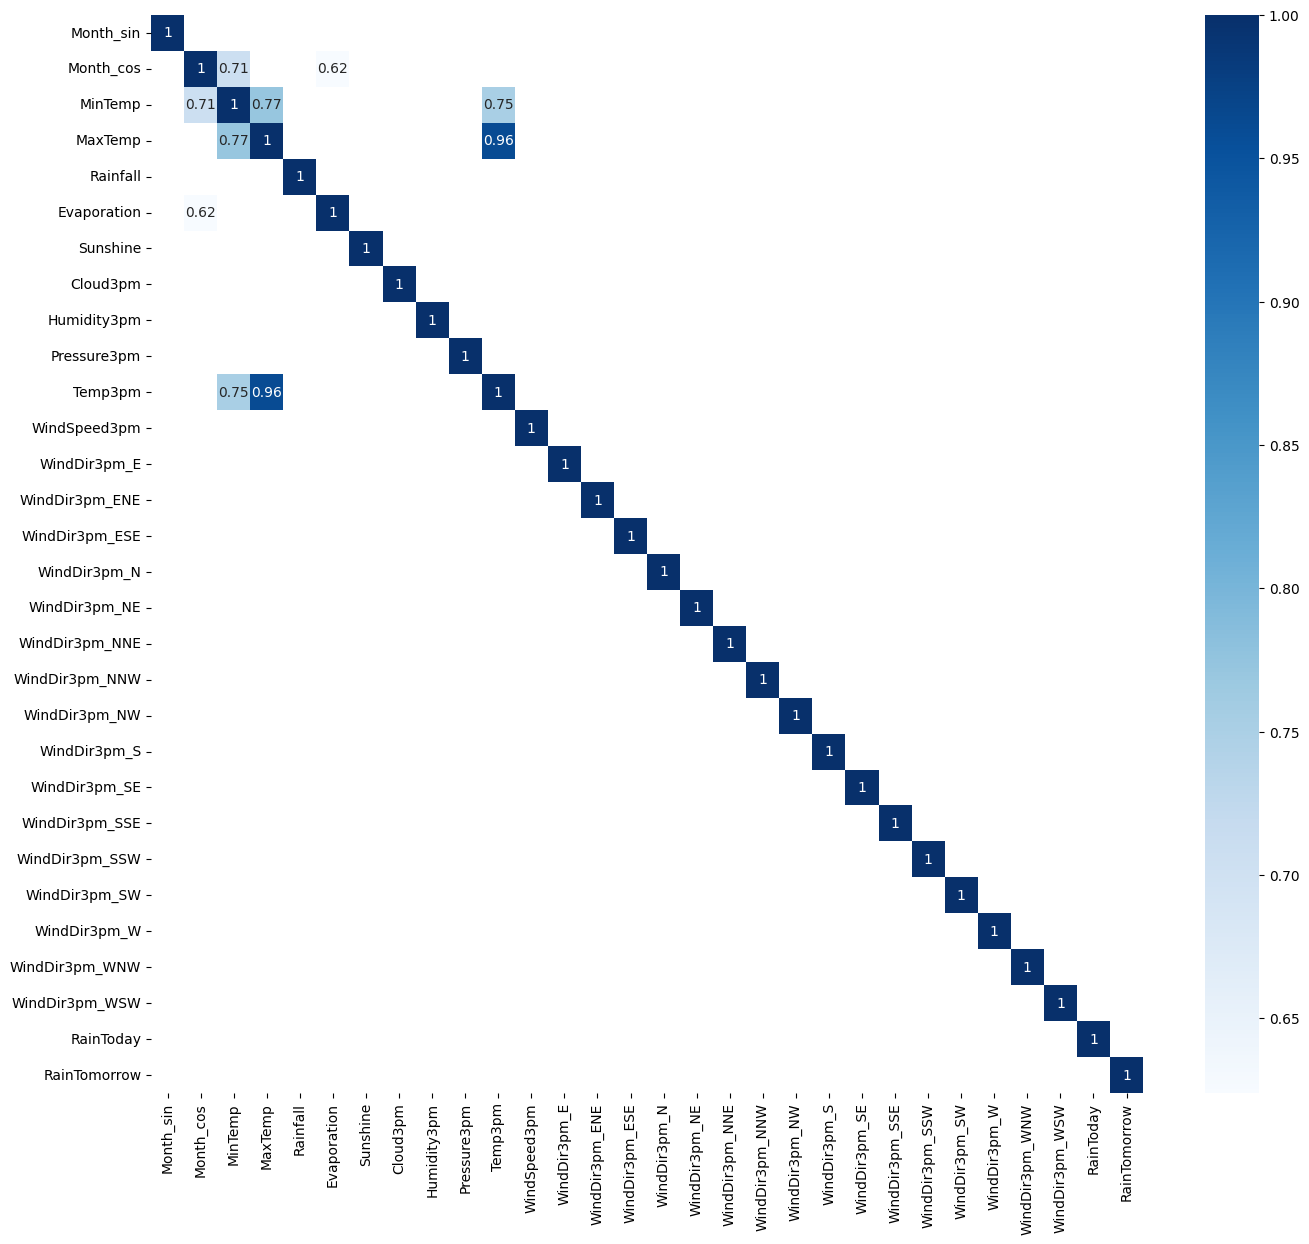

In [20]:
# Show variables that are highly correlated with r >= +0.6

corr_matrix = df_reduced.corr()

condition =  corr_matrix >= 0.6

plt.figure(figsize=(16, 14))
sns.heatmap(corr_matrix[condition], annot=True, cmap='Blues')
plt.show()

__Comment__: We can remove __MinTemp__, __MaxTemp__ and __Evaporation__, as they are already correlated with other variables. 

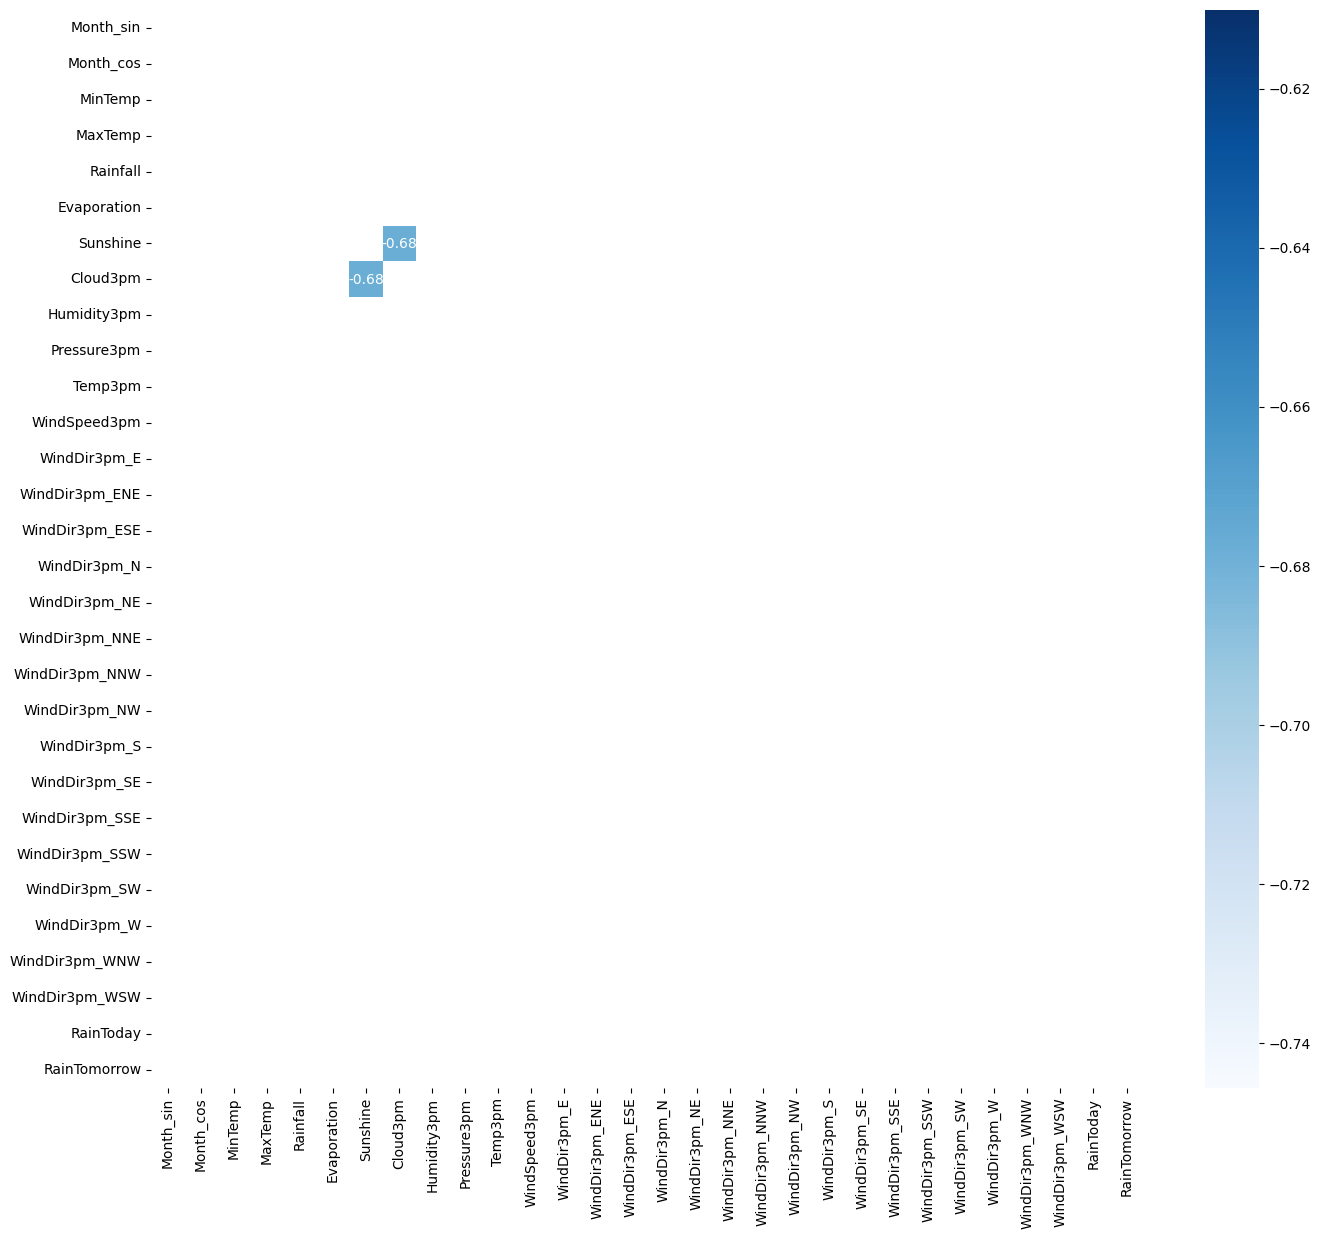

In [21]:
# Show variables that are highly correlated with r <= -0.6

corr_matrix = df_reduced.corr()

condition =  corr_matrix <= -0.6

plt.figure(figsize=(16, 14))
sns.heatmap(corr_matrix[condition], annot=True, cmap='Blues')
plt.show()

__Comment__: We can remove __Sunshine__.

In [22]:
# Create our reduced dataframe

df_final = df_reduced.drop(['MinTemp', 'MaxTemp', 'Evaporation', 'Sunshine'], axis=1)
df_final.tail()

,Month_sin,Month_cos,Rainfall,Cloud3pm,Humidity3pm,Pressure3pm,Temp3pm,WindSpeed3pm,WindDir3pm_E,WindDir3pm_ENE,...,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday,RainTomorrow
3266,1.224647e-16,-1.0,0.0,2,52,1025.3,17.9,20,0,0,...,0,0,1,0,0,0,0,0,0,0
3267,1.224647e-16,-1.0,0.0,2,53,1024.6,18.7,7,0,0,...,0,0,0,0,0,0,0,0,0,0
3268,1.224647e-16,-1.0,0.0,6,56,1015.0,17.3,13,0,0,...,0,0,0,0,0,0,0,0,0,0
3269,1.224647e-16,-1.0,0.0,2,35,1015.1,19.0,19,0,0,...,0,0,0,0,0,1,0,0,0,0
3270,1.224647e-16,-1.0,0.0,1,32,1015.4,18.8,13,0,0,...,0,0,0,0,0,1,0,0,0,0


In [73]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3271 entries, 0 to 3270
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Month_sin       3271 non-null   float64
 1   Month_cos       3271 non-null   float64
 2   Rainfall        3271 non-null   float64
 3   Cloud3pm        3271 non-null   int64  
 4   Humidity3pm     3271 non-null   int64  
 5   Pressure3pm     3271 non-null   float64
 6   Temp3pm         3271 non-null   float64
 7   WindSpeed3pm    3271 non-null   int64  
 8   WindDir3pm_E    3271 non-null   int32  
 9   WindDir3pm_ENE  3271 non-null   int32  
 10  WindDir3pm_ESE  3271 non-null   int32  
 11  WindDir3pm_N    3271 non-null   int32  
 12  WindDir3pm_NE   3271 non-null   int32  
 13  WindDir3pm_NNE  3271 non-null   int32  
 14  WindDir3pm_NNW  3271 non-null   int32  
 15  WindDir3pm_NW   3271 non-null   int32  
 16  WindDir3pm_S    3271 non-null   int32  
 17  WindDir3pm_SE   3271 non-null   i

#### Check distributions of remaining variables

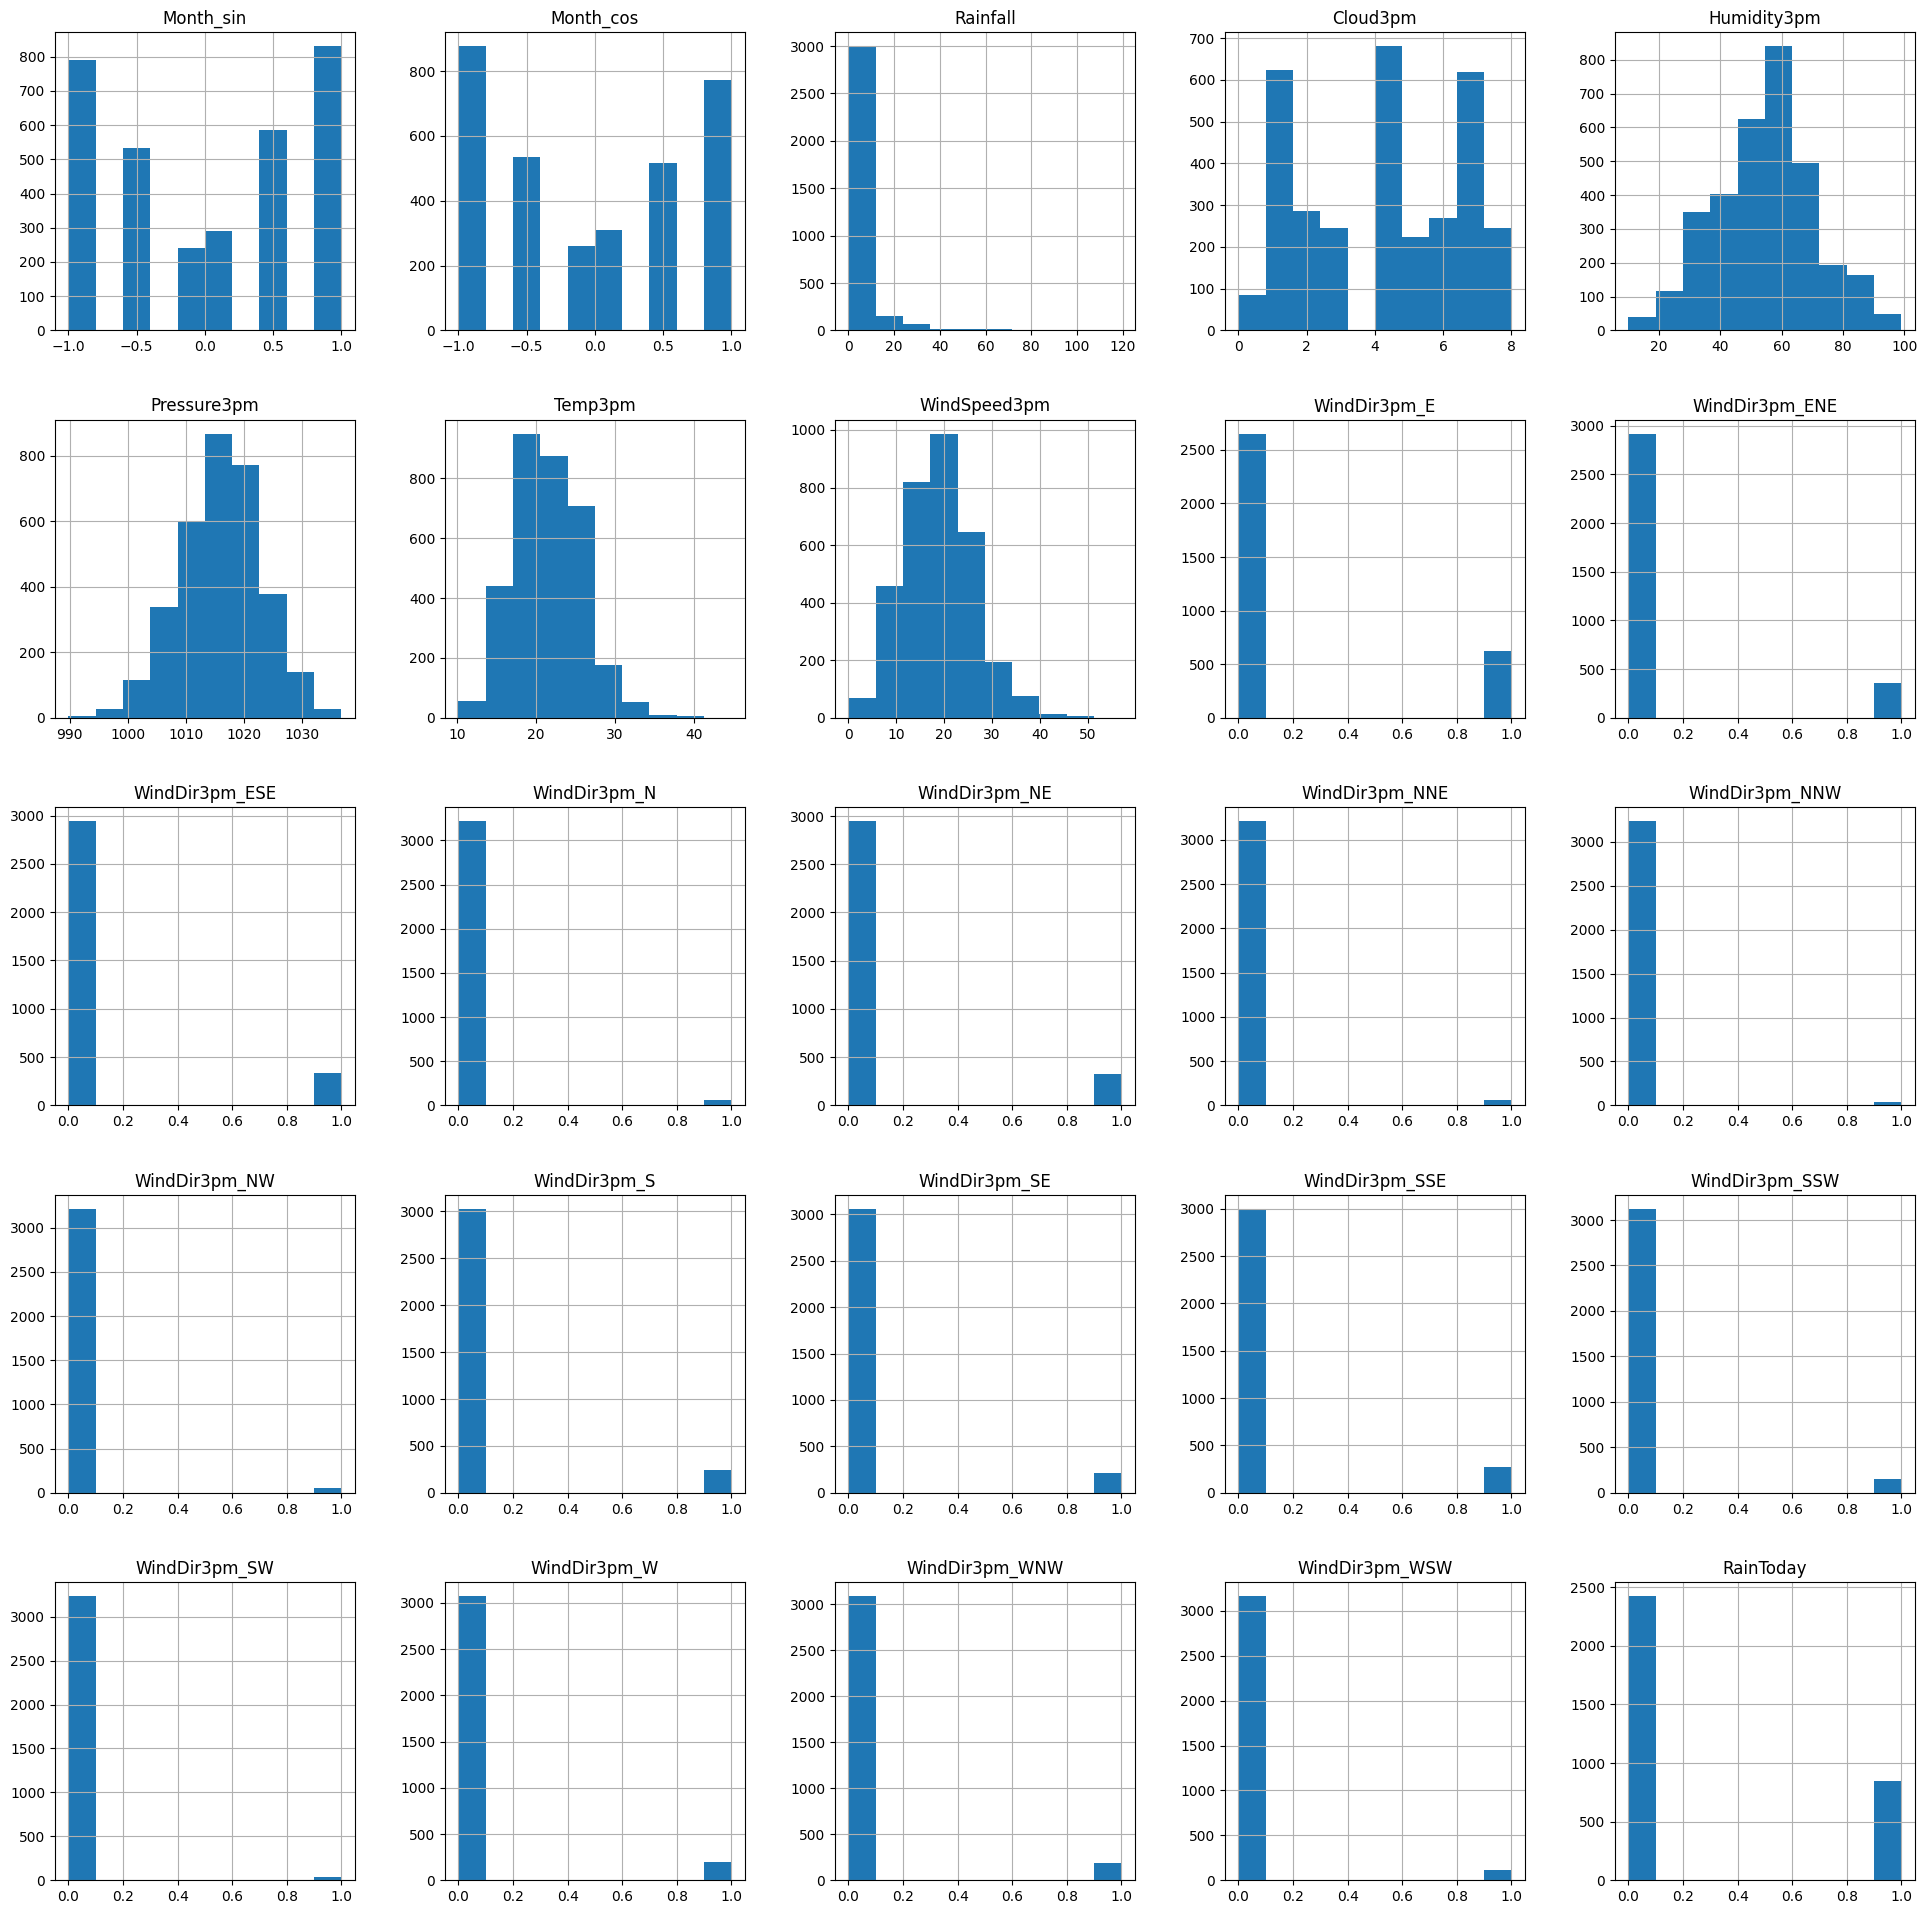

In [71]:
df_final.drop('RainTomorrow', axis=1).hist(figsize=(24,24))
plt.show()

__Comment__: The key point here is that _no feature_ shows a __uniform distribution__, which indicates that the __explanatory variable__ has a constant probability for _any_ of its values, which will not help our model classify whether the __response variable__ is 1 or 0. (Those features should not be part of the analysis.) 

In [72]:
# Create our final dataframe

df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3271 entries, 0 to 3270
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Month_sin       3271 non-null   float64
 1   Month_cos       3271 non-null   float64
 2   Rainfall        3271 non-null   float64
 3   Cloud3pm        3271 non-null   int64  
 4   Humidity3pm     3271 non-null   int64  
 5   Pressure3pm     3271 non-null   float64
 6   Temp3pm         3271 non-null   float64
 7   WindSpeed3pm    3271 non-null   int64  
 8   WindDir3pm_E    3271 non-null   int32  
 9   WindDir3pm_ENE  3271 non-null   int32  
 10  WindDir3pm_ESE  3271 non-null   int32  
 11  WindDir3pm_N    3271 non-null   int32  
 12  WindDir3pm_NE   3271 non-null   int32  
 13  WindDir3pm_NNE  3271 non-null   int32  
 14  WindDir3pm_NNW  3271 non-null   int32  
 15  WindDir3pm_NW   3271 non-null   int32  
 16  WindDir3pm_S    3271 non-null   int32  
 17  WindDir3pm_SE   3271 non-null   i

#### Why do we need the directions in our features anyway?

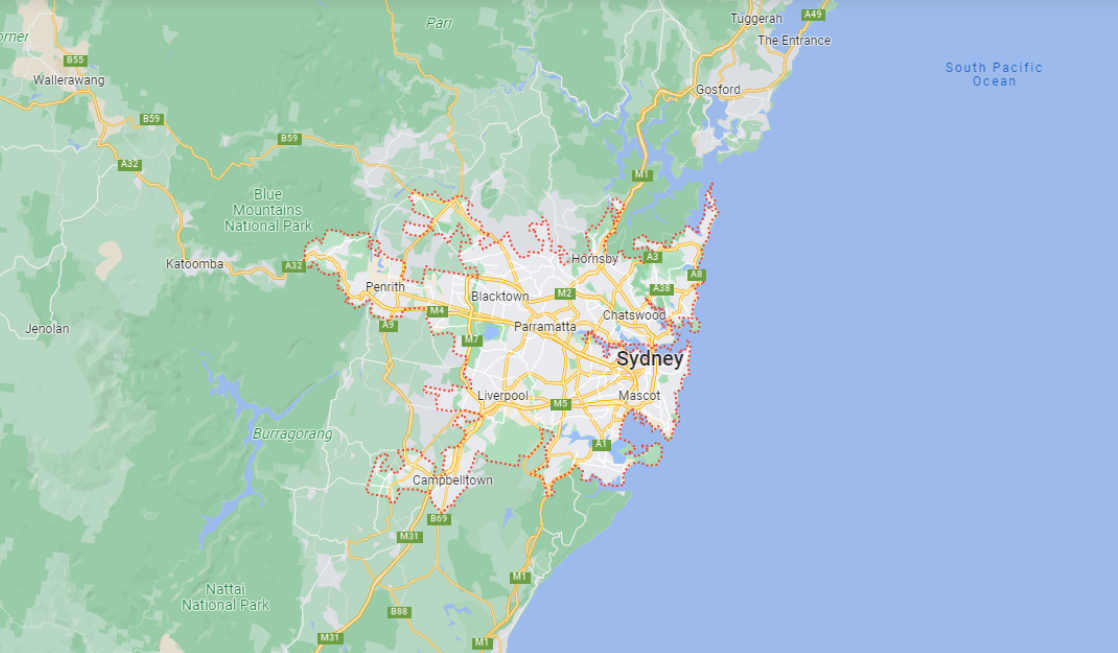

Syndey is the capital city of New South Wales and the most populous city in Australia. It is surrounded by the South Pacific Ocean from the eastern side.

Globally, trade winds affect seasons on Earth. Locally, wind direction is affected by monsoons, which affect rainfall at particular months. So, yes, we need the features on directions. A particular pattern in Sydney's wind direction might help explain the rainfall. 

#### Balanced or imbalanced dataset?

In [74]:
# Count the target's distinct values

df_final['RainTomorrow'].value_counts()

RainTomorrow
0    2422
1     849
Name: count, dtype: int64

__Comment__: Only 35% of our target's records are positive class (i.e. raining tomorrow). Thus, we have an _imbalanced_ dataset.

## Separate Features and the Target

In [75]:
features = df_final.drop('RainTomorrow', axis=1)
y = df_final['RainTomorrow']

In [78]:
features.head()

,Month_sin,Month_cos,Rainfall,Cloud3pm,Humidity3pm,Pressure3pm,Temp3pm,WindSpeed3pm,WindDir3pm_E,WindDir3pm_ENE,...,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday
0,0.866025,0.5,15.6,8,84,1017.4,20.9,20,0,0,...,0,0,0,0,1,0,0,0,0,1
1,0.866025,0.5,6.0,7,73,1016.4,24.8,13,1,0,...,0,0,0,0,0,0,0,0,0,1
2,0.866025,0.5,6.6,8,86,1015.6,23.0,2,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0.866025,0.5,18.8,8,90,1011.8,20.9,20,1,0,...,0,0,0,0,0,0,0,0,0,1
4,0.866025,0.5,77.4,8,74,1004.8,25.5,6,0,0,...,0,0,0,0,0,0,1,0,0,1


## Normalization of Features

Before we do our modelling, we need to normalize the scales of our selected features so that our algorithms treat each of them equally.

In [79]:
scaler = StandardScaler()

normalized_array = scaler.fit_transform(features)
features_scaled = pd.DataFrame(normalized_array, columns=features.columns)

features_scaled.head()

,Month_sin,Month_cos,Rainfall,Cloud3pm,Humidity3pm,Pressure3pm,Temp3pm,WindSpeed3pm,WindDir3pm_E,WindDir3pm_ENE,...,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday
0,1.195077,0.753259,1.236139,1.586088,1.800202,0.199024,-0.149813,0.094683,-0.485529,-0.349467,...,-0.135531,-0.284543,-0.264581,-0.302365,4.577447,-0.112665,-0.255876,-0.243437,-0.187421,1.689014
1,1.195077,0.753259,0.268029,1.171306,1.124391,0.056550,0.757924,-0.844638,2.059609,-0.349467,...,-0.135531,-0.284543,-0.264581,-0.302365,-0.218462,-0.112665,-0.255876,-0.243437,-0.187421,1.689014
2,1.195077,0.753259,0.328536,1.586088,1.923076,-0.057429,0.338969,-2.320714,-0.485529,-0.349467,...,-0.135531,-0.284543,-0.264581,-0.302365,-0.218462,-0.112665,-0.255876,-0.243437,-0.187421,1.689014
3,1.195077,0.753259,1.558843,1.586088,2.168826,-0.598829,-0.149813,0.094683,2.059609,-0.349467,...,-0.135531,-0.284543,-0.264581,-0.302365,-0.218462,-0.112665,-0.255876,-0.243437,-0.187421,1.689014
4,1.195077,0.753259,7.468346,1.586088,1.185828,-1.596144,0.920852,-1.783959,-0.485529,-0.349467,...,-0.135531,-0.284543,-0.264581,-0.302365,-0.218462,-0.112665,3.908149,-0.243437,-0.187421,1.689014


__NOTE TO SELF__: Our source dataframe for train-test split is named __features_scaled__.

## Creat training and testing sets

In [80]:
X_train, X_test, y_train, y_test = train_test_split(features_scaled, y, test_size=0.20, random_state=8)

print(len(X_train), ':', len(y_train))
print(len(X_test), ':', len(y_test))

2616 : 2616
655 : 655


## Machine Learning Modeling

We will use 5 models for classifying rain (or not rain) tomorrow using Logistic Regression, SVM, Decision Tree, Random Forest, and Gradient Boosting.

### 1. Logistic Regression

In [81]:
# Create our Logistic Regression model

log_reg = LogisticRegression(solver='liblinear')

# Find the best C parameter using GridSearchCV

param_grid_LR = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_search_LR = GridSearchCV(log_reg, param_grid_LR, cv=5)

grid_search_LR.fit(X_train, y_train)

# Print the best parameter and accuracy score

print("Best C:", grid_search_LR.best_params_['C'])
print("Best score:", grid_search_LR.best_score_)

# Assign the best Logistic Regression model

log_reg_final = grid_search_LR.best_estimator_
log_reg_final

Best C: 0.1
Best score: 0.8329536000467064


LogisticRegression(C=0.1, solver='liblinear')

In [82]:
# Evaluate our model

y_pred_LR = log_reg_final.predict(X_test)

report = classification_report(y_test, y_pred_LR)

print(report)

              precision    recall  f1-score   support

           0       0.85      0.94      0.89       477
           1       0.78      0.55      0.64       178

    accuracy                           0.84       655
   macro avg       0.81      0.75      0.77       655
weighted avg       0.83      0.84      0.83       655



### 2. Support Vector Machine 

In [84]:
# Create our SVM model

svm = SVC()

# Find the best C parameter using GridSearchCV

param_grid_svm = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_search_svm = GridSearchCV(svm, param_grid_svm, cv=5)

grid_search_svm.fit(X_train, y_train)

# Print the best parameter and accuracy score

print('Best C:', grid_search_svm.best_params_['C'])
print('Best score:', grid_search_svm.best_score_)

# Assign the best SVM model

svm_final = grid_search_svm.best_estimator_
svm_final

Best C: 1
Best score: 0.8329557894122284


SVC(C=1)

In [85]:
# Evaluate our model

y_pred_svm = svm_final.predict(X_test)

report = classification_report(y_test, y_pred_svm)

print(report)

              precision    recall  f1-score   support

           0       0.81      0.97      0.88       477
           1       0.82      0.40      0.54       178

    accuracy                           0.81       655
   macro avg       0.81      0.68      0.71       655
weighted avg       0.81      0.81      0.79       655



### 3. Decision Tree Classifier

In [87]:
# Create our DTC model

dtc = DecisionTreeClassifier()

# Find the best max_depth parameter using GridSearchCV

param_grid_dtc = {'max_depth': list(range(1, 16))}

grid_search_dtc = GridSearchCV(dtc, param_grid_dtc, cv=5)

grid_search_dtc.fit(X_train, y_train)

# Print the best parameter and accuracy score

print('Best max_depth:', grid_search_dtc.best_params_['max_depth'])
print('Best score:', grid_search_dtc.best_score_)

# Assign our best DTC model

dtc_final = grid_search_dtc.best_estimator_
dtc_final

Best max_depth: 4
Best score: 0.831428342066469


DecisionTreeClassifier(max_depth=4)

In [88]:
# Evaluate our model

y_pred_dtc = dtc_final.predict(X_test)

report = classification_report(y_test, y_pred_dtc)

print(report)

              precision    recall  f1-score   support

           0       0.81      0.93      0.87       477
           1       0.69      0.42      0.52       178

    accuracy                           0.79       655
   macro avg       0.75      0.68      0.70       655
weighted avg       0.78      0.79      0.77       655



### 4. Random Forest Classifier

In [91]:
# Create our RFC model

rfc = RandomForestClassifier(random_state=8)

# Find the best max_features parameter using GridSearchCV

param_grid_rfc = {'max_features': list(range(1,26))}

grid_search_rfc = GridSearchCV(rfc, param_grid_rfc, cv=5)

grid_search_rfc.fit(X_train, y_train)

# Print the best parameter and accuracy score

print('Best max_features:', grid_search_rfc.best_params_['max_features'])
print('Best score:', grid_search_rfc.best_score_)

# Assign our best rf model

rfc_final = grid_search_rfc.best_estimator_
rfc_final

Best max_features: 4
Best score: 0.834869294878344


RandomForestClassifier(max_features=4, random_state=8)

In [92]:
# Evaluate our model

y_pred_rfc = rfc_final.predict(X_test)

report = classification_report(y_test, y_pred_rfc)

print(report)

              precision    recall  f1-score   support

           0       0.84      0.94      0.88       477
           1       0.75      0.51      0.60       178

    accuracy                           0.82       655
   macro avg       0.79      0.72      0.74       655
weighted avg       0.81      0.82      0.81       655



### 5. Gradient Boosting Classifier

In [93]:
# Create our GBC model

gbc = GradientBoostingClassifier()

# Find the best max_depth parameter using GridSearchCV

param_grid_gbc = {'learning_rate': [0.001, 0.01, 0.1, 0.2]}

grid_search_gbc = GridSearchCV(gbc, param_grid_gbc, cv=5)

grid_search_gbc.fit(X_train, y_train)

# Print the best parameter and accuracy score

print('Best learning_rate:', grid_search_gbc.best_params_['learning_rate'])
print('Best score:', grid_search_gbc.best_score_)

# Assign our best DTC model

gbc_final = grid_search_gbc.best_estimator_
gbc_final

Best learning_rate: 0.1
Best score: 0.8390757958343672


GradientBoostingClassifier()

In [94]:
# Evaluate our model

y_pred_gbc = gbc_final.predict(X_test)

report = classification_report(y_test, y_pred_gbc)

print(report)

              precision    recall  f1-score   support

           0       0.84      0.93      0.88       477
           1       0.74      0.52      0.61       178

    accuracy                           0.82       655
   macro avg       0.79      0.73      0.75       655
weighted avg       0.81      0.82      0.81       655



## Comparison of Models

Since our dataset is imbalanced (only 35% of the records indicate raining tomorrow), let's judge our models using the weighted f1-score. 

In case of a tie, we compare their recall scores. Why recall (not precision)? Because we want to _minimize false negatives_. In other words, if we forecast _not_ raining tomorrow, people won't bring umbrellas, so we better be more accurate about that forecast. 

In [106]:
# Summarize scores for our 5 models

data = {'LogReg': [0.83, 0.84],
        'RF': [0.81, 0.82],
        'GBC': [0.80, 0.81],
        'SVM': [0.79, 0.81],
        'DTC': [0.77, 0.79]
        }

clf_scores = pd.DataFrame(data)
clf_scores.index = ['weighted f1', 'weighted recall']
clf_scores

,LogReg,RF,GBC,SVM,DTC
weighted f1,0.83,0.81,0.80,0.79,0.77
weighted recall,0.84,0.82,0.81,0.81,0.79


Our best model is __Logistic Regression__, followed by __Random Forest__. Meanwhile, Decision Tree model performed the weakest for our dataset. 

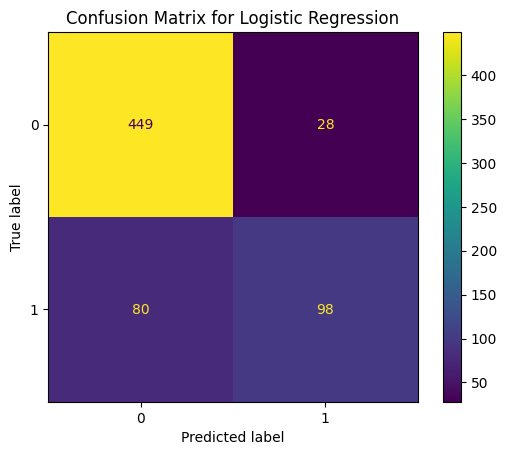

In [100]:
# Create the confusion matrix for our Logistic Regression model

cm = confusion_matrix(y_test, y_pred_LR)

cm_display = ConfusionMatrixDisplay(cm)
cm_display.plot()
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

## Conclusion

Out of the five models analyzed for Sydney's historical weather data from 2008 to 2017, our best model for predicting next-day rain is Logistic Regression (C=10, solver='liblinear', the rest of the parameters are default). Its weighted f1-score is 0.83. Decision Tree (max_depth=4, the rest of the parameters are default) performed the weakest prediction with a score of 0.77. 

In [107]:
data_LR = {'Logistic Regression': [0.83, 0.84, 0.84]}

LR_scores = pd.DataFrame(data_LR)
LR_scores.index = ['weighted f1', 'weighted recall', 'accuracy']
LR_scores

,Logistic Regression
weighted f1,0.83
weighted recall,0.84
accuracy,0.84
